In [3]:
!pip install pgmpy

# Supressing the future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import the bayesian model to create the Directed Acyclic Graph (DAG)
from pgmpy.models import BayesianModel, BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# For visualizing the Graph we will be using networkx
import networkx as nx

# pylab for the plots
import pylab as plt


## We have imported the modules to continue with the use case

### The follow is the usecase, it is as follows

## C: Cloudy, R: Rain, S: Sprinkler and W: Wet grass

- Cloudy is the Confounder or the fork and it causes Rain and the Sprinkler to activate
- S could be the cause for the Grass to become wet.
- R could aslo be the cause for the Grass to become wet.

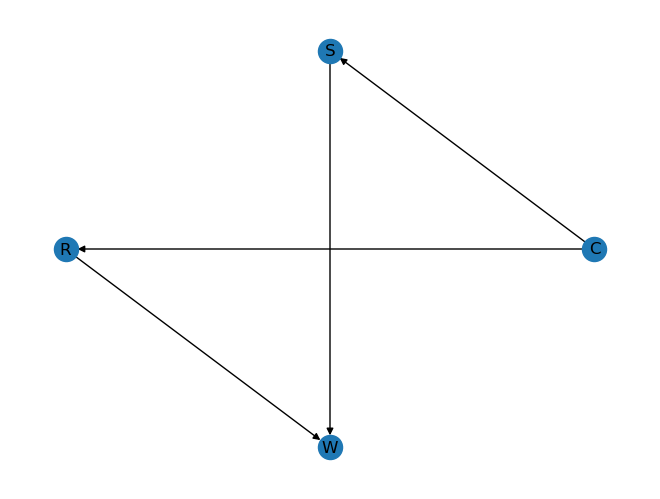

In [5]:
# creating a BayesianModel for the Network
# Using BayesianNetwork instead of BayesianModel
model = BayesianNetwork([('C','S'),('C','R'),('S','W'),('R','W')])


#calculating the Position pos
pos = nx.circular_layout(model)

# The below is used to draw the model as a graph
nx.draw(model, pos=pos, with_labels=True)
# This is to invoke the plot as a graph
plt.show()

## 

In [7]:
# Defining the Conditionali Probablity Table (CPT)

CPT_C = TabularCPD(variable='C', variable_card=2, 
                   values=[[0.5], [0.5]])

#sprinkler
CPT_S = TabularCPD(variable='S', variable_card=2,
                   values=[ [0.5, 0.9],
                            [0.5, 0.1]
                          ],
                   evidence=['C'], evidence_card=[2]
                  )

#rain
CPT_R = TabularCPD(variable='R', variable_card=2,
                   values=[ [0.8, 0.2],
                            [0.2, 0.8]
                          ],
                   evidence=['C'], evidence_card=[2]
                  )

# wet grass
CPT_W = TabularCPD(variable='W', variable_card=2,
                   values=[ [1.0, 0.1, 0.1, 0.001],
                            [0.0, 0.9, 0.9, 0.99]
                          ],
                   evidence=['S','R'], evidence_card=[2,2]
                  )
model.add_cpds(CPT_C, CPT_S, CPT_R, CPT_W)
model.check_model()

True

## Now the Conditional probabilities are set, we can inferer the probablities of others

In [17]:
# import VariableElimination to infer Posterior probability

from pgmpy.inference import VariableElimination


infer = VariableElimination(model)
# posterior_p = infer.query(variables = ['R', 'C'], evidence={'W': 0, 'S':0})
posterior_p = infer.query(variables = ['R'], evidence={'W': 1})
print(posterior_p)

+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.2921 |
+------+----------+
| R(1) |   0.7079 |
+------+----------+


In [18]:
help(model)

Help on BayesianNetwork in module pgmpy.models.BayesianNetwork object:

class BayesianNetwork(pgmpy.base.DAG.DAG)
 |  BayesianNetwork(ebunch=None, latents=set())
 |  
 |  Base class for Bayesian Models.
 |  
 |  Method resolution order:
 |      BayesianNetwork
 |      pgmpy.base.DAG.DAG
 |      networkx.classes.digraph.DiGraph
 |      networkx.classes.graph.Graph
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ebunch=None, latents=set())
 |      Initializes a Bayesian Model.
 |      A models stores nodes and edges with conditional probability
 |      distribution (cpd) and other attributes.
 |      
 |      models hold directed edges.  Self loops are not allowed neither
 |      multiple (parallel) edges.
 |      
 |      Nodes can be any hashable python object.
 |      
 |      Edges are represented as links between nodes.
 |      
 |      Parameters
 |      ----------
 |      data : input graph
 |          Data to initialize graph.  If data=None (default

In [30]:
model_c = model.copy()

In [31]:
model_c = model_c.do(nodes=['C', 'S'])
# removing the co-reltion between the nodes C and S

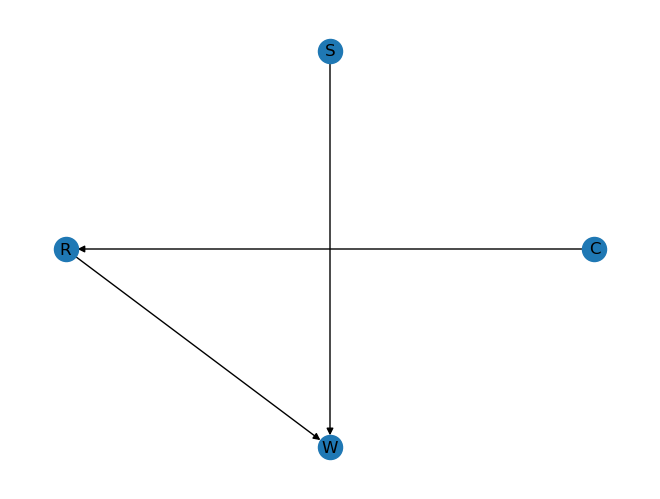

In [32]:
pos_new = nx.circular_layout(model_c)
nx.draw(model_c, pos=pos, with_labels=True)
plt.show()

#plotting the DAG after the correlation between the nodes are removed

In [36]:
# model_c.add_cpds(CPT_C, CPT_R, CPT_W)
# model_c.check_model()

In [37]:
model.get_independencies()

(C ⟂ W | S, R)
(W ⟂ C | S, R)
(S ⟂ R | C)
(R ⟂ S | C)

In [38]:
model.get_immoralities()

{('R', 'S')}